In [1]:
# Question 3: Implement a Simple CNN for Image Classification
# Description: Use Keras to implement a basic Convolutional Neural Network (CNN) to classify the MNIST digit dataset.

2025-05-13 17:32:50.897951: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 17:32:51.198839: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 17:32:51.309163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747157571.605731    2822 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747157571.700555    2822 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747157572.358023    2822 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/5


2025-05-13 17:32:58.910509: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.8718 - loss: 0.4247 - val_accuracy: 0.9808 - val_loss: 0.0629
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9821 - loss: 0.0599 - val_accuracy: 0.9877 - val_loss: 0.0419
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9880 - loss: 0.0383 - val_accuracy: 0.9877 - val_loss: 0.0426
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9905 - val_loss: 0.0372
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9882 - val_loss: 0.0409
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9819 - loss: 0.0555

Test accuracy: 0.9854


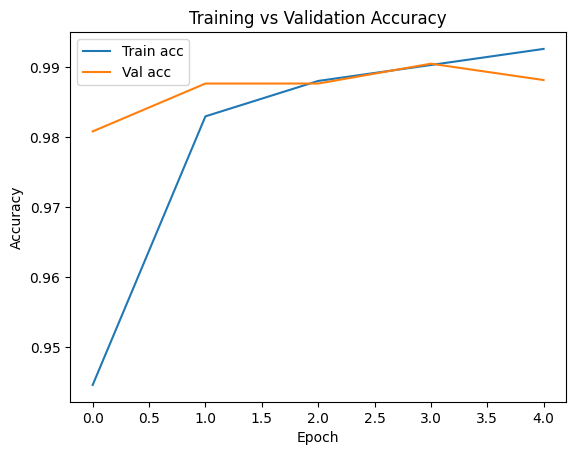

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# 7. Plot training history
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
